In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager'in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'head' in title.lower():
        return 'head'
    elif 'lead' in title.lower():
        return 'lead'
    else:
        return 'na'

In [8]:
df['job_simplify'] = df['job_title'].apply(title_simplifier)

In [9]:
df.job_simplify.value_counts()

data engineer     1640
data scientist     871
analyst            684
na                 403
manager            113
head                20
lead                13
director            11
Name: job_simplify, dtype: int64

In [10]:
df.company_location.value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [11]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


<Axes: >

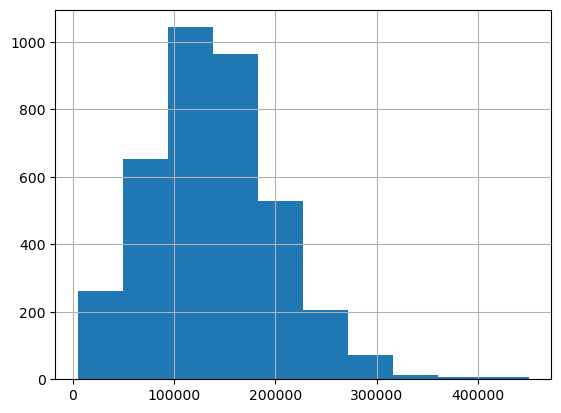

In [12]:
df.salary_in_usd.hist()

<Axes: >

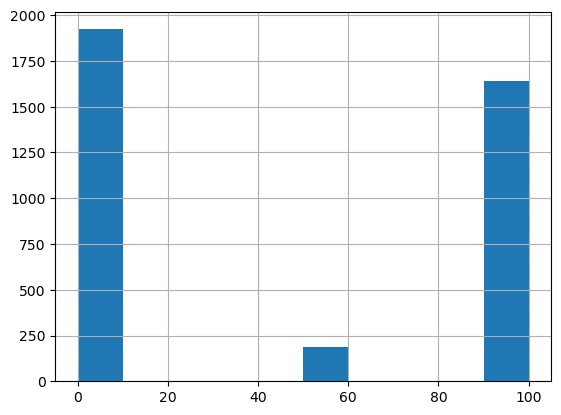

In [13]:
df.remote_ratio.hist()

<Axes: >

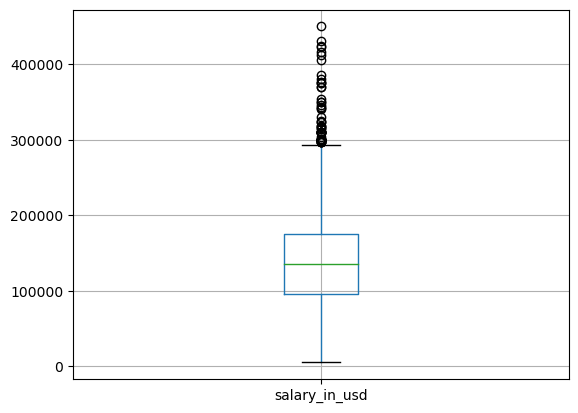

In [18]:
df.boxplot(column = 'salary_in_usd')

In [19]:
df[['remote_ratio', 'salary_in_usd']].corr()

,remote_ratio,salary_in_usd
remote_ratio,1.000000,-0.064171
salary_in_usd,-0.064171,1.000000


<Axes: >

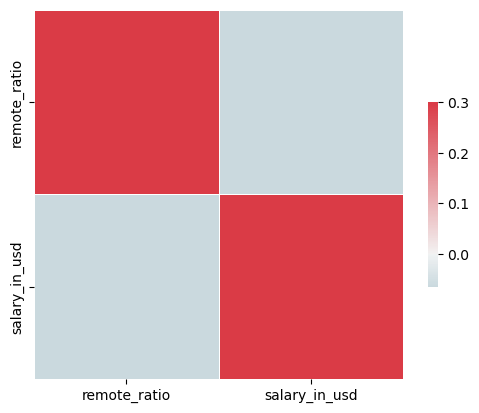

In [24]:
cmap  = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['remote_ratio', 'salary_in_usd']].corr(), vmax = .3, center = 0,
           cmap = cmap, square = True, linewidths =.5, cbar_kws = {"shrink": .5})

In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_simplify'],
      dtype='object')

In [28]:
df_cat = df[['experience_level', 'employment_type', 'job_simplify','employee_residence',
    'company_location', 'company_size']]

graph for experience_level: total = 4


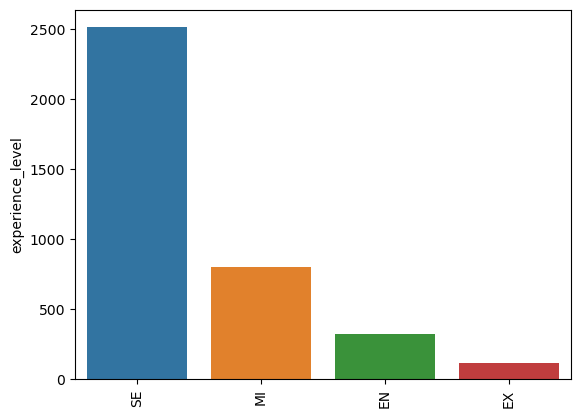

graph for employment_type: total = 4


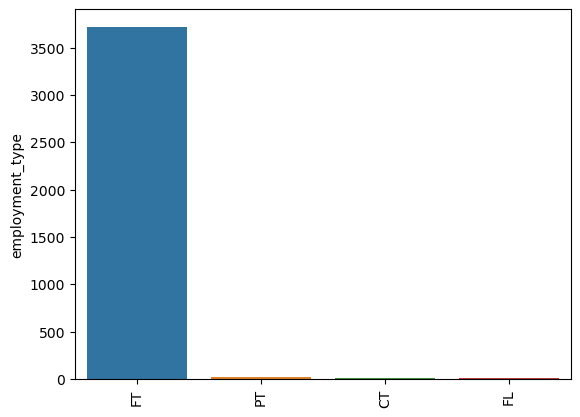

graph for job_simplify: total = 8


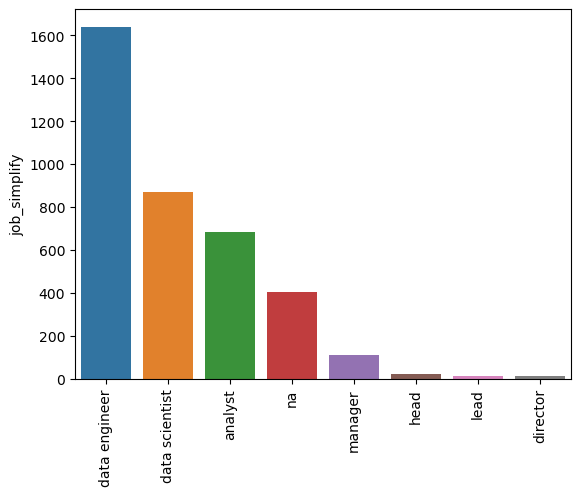

graph for employee_residence: total = 78


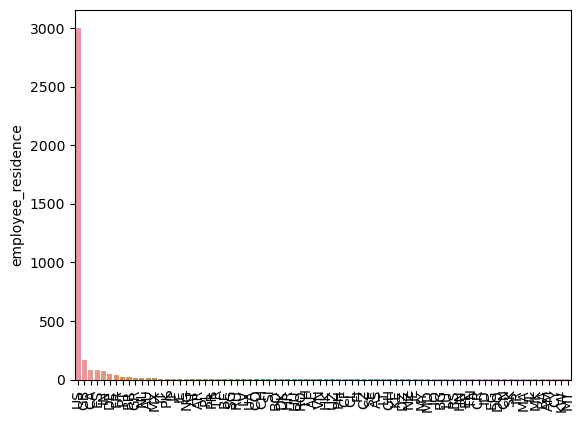

graph for company_location: total = 72


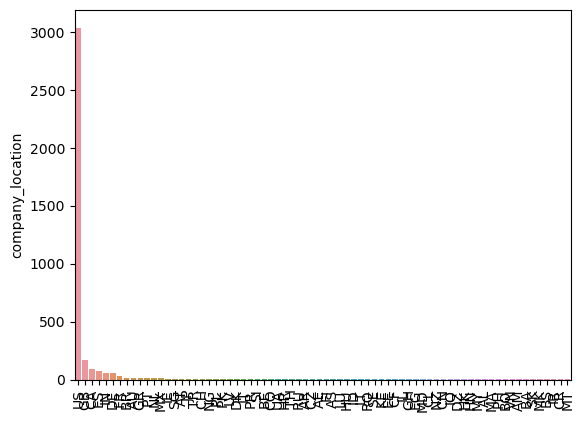

graph for company_size: total = 3


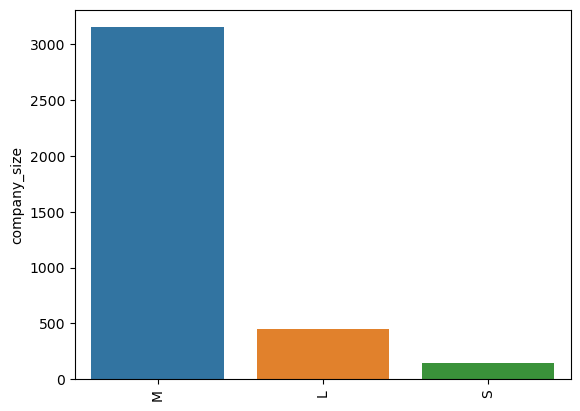

In [34]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y = cat_num, data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

graph for employee_residence: total = 20


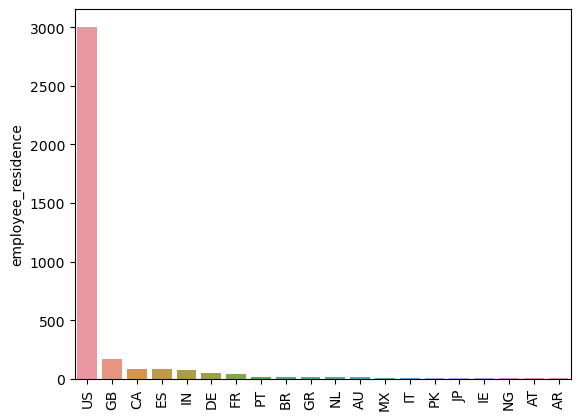

graph for company_location: total = 20


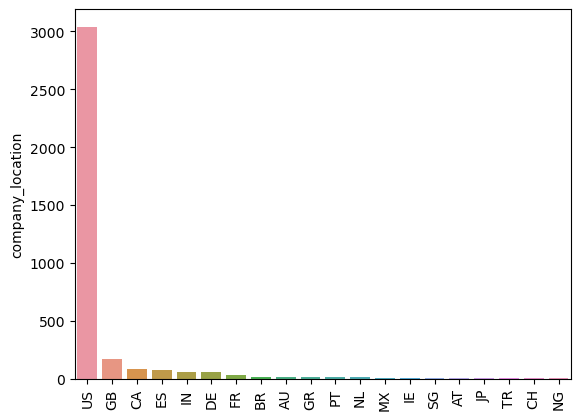

In [36]:
for i in df_cat[['employee_residence', 'company_location']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y = cat_num, data = df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [40]:
df.groupby('job_simplify')['salary_in_usd'].mean()

job_simplify
analyst           105292.103801
data engineer     144428.920122
data scientist    140589.576349
director          195140.727273
head              168010.450000
lead              190244.923077
manager           160968.141593
na                146577.478908
Name: salary_in_usd, dtype: float64

In [41]:
df.groupby(['job_simplify', 'experience_level'])['salary_in_usd'].mean()

job_simplify    experience_level
analyst         EN                   57698.061728
                EX                  101250.000000
                MI                   96019.781726
                SE                  119466.067164
data engineer   EN                   89840.132231
                EX                  203703.183333
                MI                  108171.264881
                SE                  157992.018700
data scientist  EN                   73727.564516
                EX                  198750.000000
                MI                   93810.988166
                SE                  158603.835726
director        EX                  224384.500000
                SE                  117157.333333
head            EX                  198567.071429
                MI                   67438.333333
                SE                  125985.000000
lead            MI                   75296.000000
                SE                  241333.333333
manager         E

In [47]:
pd.pivot_table(df, index = 'company_location', values = 'salary_in_usd', aggfunc = np.mean).sort_values('salary_in_usd', ascending = False)

,salary_in_usd
company_location,
IL,271446.500000
PR,167500.000000
US,151822.009539
RU,140333.333333
CA,131917.689655
...,...
VN,12000.000000
AL,10000.000000
MA,10000.000000


In [50]:
pd.pivot_table(df, index = ['company_location', 'job_simplify'], values = 'salary_in_usd', aggfunc = np.mean).sort_values('company_location', ascending = False)

salary_in_usd
company_location job_simplify                 
VN               data engineer    12000.000000
US               na              163110.067524
                 manager         168465.780000
                 lead            232200.000000
                 head            219170.454545
...                                        ...
AR               data engineer    12500.000000
AM               data engineer    50000.000000
AL               na               10000.000000
AE               data scientist  115000.000000
                 data engineer    92500.000000

[167 rows x 1 columns]

In [54]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [58]:
pd.pivot_table(df[df.job_simplify == 'data scientist'], index = ['company_location'], values = 'salary_in_usd', aggfunc = np.mean).sort_values('salary_in_usd', ascending = False)

,salary_in_usd
company_location,
US,159251.020408
CA,136487.000000
IE,126873.600000
CH,120747.500000
IL,119059.000000
AE,115000.000000
DZ,100000.000000
GB,86564.090909
NL,83264.750000


In [59]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_simplify'],
      dtype='object')

In [65]:
df_pivots = df[['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence','remote_ratio', 'salary_in_usd',
                'company_location', 'company_size', 'job_simplify']]

In [67]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index =  i, values = 'salary_in_usd', aggfunc = np.mean).sort_values('salary_in_usd', ascending = False))

work_year
           salary_in_usd
work_year               
2023       149045.541176
2022       133338.620793
2021        94087.208696
2020        92302.631579
experience_level
                  salary_in_usd
experience_level               
EX                194930.929825
SE                153051.071542
MI                104525.939130
EN                 78546.284375
employment_type
                 salary_in_usd
employment_type               
FT               138314.199570
CT               113446.900000
FL                51807.800000
PT                39533.705882
job_title
                                          salary_in_usd
job_title                                              
Data Science Tech Lead                    375000.000000
Cloud Data Architect                      250000.000000
Data Lead                                 212500.000000
Data Analytics Lead                       211254.500000
Principal Data Scientist                  198171.125000
Director of Data Science   

ValueError: Grouper for 'salary_in_usd' not 1-dimensional